# GTE cycle analysis

## requirements

In [ ]:
%pip install --upgrade -r requirements.txt

In [1]:
import os
import time
from colorama import Fore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

## consts

Директория с данными

In [4]:
data_directory = './nodes/cycle'

## Import data

Содержание деректории

In [3]:
for root, dirs, files in os.walk(data_directory):
    print(Fore.RED + f'{root = }' + Fore.RESET)
    print(Fore.YELLOW + f'{dirs = }' + Fore.RESET)
    print(Fore.GREEN + f'{files = }'+ Fore.RESET)

root = './exports/cycle'
dirs = []
files = ['cycle_m5_T1773.xlsx', 'cycle_m6_T1773.xlsx', 'cycle_m7_T1773.xlsx', 'cycle_m8_T1773.xlsx', 'cycle_m9_T1773.xlsx', 'cycle_m3_T1773.xlsx', 'cycle_m4_T1773.xlsx', 'gte_cycle.pdf']


In [4]:
listdir = tuple(filter(lambda s: s.startswith('cycle_') and s.endswith('.xlsx'), os.listdir(data_directory)))
listdir

('cycle_m5_T1773.xlsx',
 'cycle_m6_T1773.xlsx',
 'cycle_m7_T1773.xlsx',
 'cycle_m8_T1773.xlsx',
 'cycle_m9_T1773.xlsx',
 'cycle_m3_T1773.xlsx',
 'cycle_m4_T1773.xlsx')

## concat data

In [5]:
df = pd.concat([pd.read_excel(f'{data_directory}/{file}').iloc[1:] for file in listdir], 
               axis=0, ignore_index=True)

In [6]:
df

H.υ M.υ R.υ T.Л.доп T.Т.доп m2        Cx     Fuel       R.удII  \
0     0   0  80    1373    1273  5   0.04976  Керосин   786.650071   
1     0   0  80    1373    1273  5   0.04976  Керосин   830.987811   
2     0   0  80    1373    1273  5   0.04976  Керосин   872.654023   
3     0   0  80    1373    1273  5   0.04976  Керосин   912.024979   
4     0   0  80    1373    1273  5   0.04976  Керосин    949.39555   
..   ..  ..  ..     ...     ... ..       ...      ...          ...   
282   0   0  80    1373    1273  4  0.050708  Керосин  1347.034014   
283   0   0  80    1373    1273  4  0.050708  Керосин   1359.60138   
284   0   0  80    1373    1273  4  0.050708  Керосин  1371.890922   
285   0   0  80    1373    1273  4  0.050708  Керосин  1374.118565   
286   0   0  80    1373    1273  4  0.050708  Керосин  1376.326059   

          R.удI  ...     P*.ТНД3      P*.СТ1      P*.СТ3    P*.СМII1  \
0    624.991207  ...  467.379571  467.379571  467.379571  117.370827   
1    623.204943  ...  454.409838  454.409838  454.409838  119.327007   
2    621.430909  ...  441.851871  441.851871  441.851871  121.283188   
3    619.671133  ...  429.705447  429.705447  429.705447  123.239368   
4    617.925263  ...  417.953881  417.953881  417.953881  125.195549   
..          ...  ...         ...         ...         ...         ...   
282  583.409243  ...  239.227439  239.227439  239.227439  187.793323   
283  582.290509  ...  234.769943  234.769943  234.769943  189.749504   
284  581.177153  ...  230.408425  230.408425  230.408425  191.705684   
285  580.072806  ...  226.154146  226.154146  226.154146  193.661865   
286  578.974211  ...  221.992409  221.992409  221.992409  195.618045   

        P*.СМI1      P*.СМ3     P*.СII1     P*.СII3      P*.СI1      P*.СI3  
0    467.379571  467.379571  117.370827     101.325  467.379571   254.40777  
1    454.409838  454.409838  119.327007     101.325  454.409838  247.314491  
2    441.851871  441.851871  121.283188     101.325  441.851871  240.447158  
3    429.705447  429.705447  123.239368     101.325  429.705447  233.805606  
4    417.953881  417.953881  125.195549     101.325  417.953881  227.380666  
..          ...         ...         ...         ...         ...         ...  
282  239.227439  239.227439  187.793323     101.325  239.227439  129.771804  
283  234.769943  234.769943  189.749504     101.325  234.769943   127.34102  
284  230.408425  230.408425  191.705684  101.333226  230.408425  124.962787  
285  226.154146  226.154146  193.661865  102.369639  226.154146  122.643237  
286  221.992409  221.992409  195.618045  103.406103  221.992409  120.374345  

[287 rows x 224 columns]

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Columns: 224 entries, H.υ to P*.СI3
dtypes: object(224)
memory usage: 2.0 MB


## export data

In [8]:
if 'cycle.pickle' not in os.listdir(data_directory): df.to_pickle(f'{data_directory}/cycle.pickle')
if 'cycle.xlsx' not in os.listdir(data_directory): df.to_excel(f'{data_directory}/cycle.xlsx', sheet_name='cycle', header=True, index=False)
df

H.υ M.υ R.υ T.Л.доп T.Т.доп m2        Cx     Fuel       R.удII  \
0     0   0  80    1373    1273  5   0.04976  Керосин   786.650071   
1     0   0  80    1373    1273  5   0.04976  Керосин   830.987811   
2     0   0  80    1373    1273  5   0.04976  Керосин   872.654023   
3     0   0  80    1373    1273  5   0.04976  Керосин   912.024979   
4     0   0  80    1373    1273  5   0.04976  Керосин    949.39555   
..   ..  ..  ..     ...     ... ..       ...      ...          ...   
282   0   0  80    1373    1273  4  0.050708  Керосин  1347.034014   
283   0   0  80    1373    1273  4  0.050708  Керосин   1359.60138   
284   0   0  80    1373    1273  4  0.050708  Керосин  1371.890922   
285   0   0  80    1373    1273  4  0.050708  Керосин  1374.118565   
286   0   0  80    1373    1273  4  0.050708  Керосин  1376.326059   

          R.удI  ...     P*.ТНД3      P*.СТ1      P*.СТ3    P*.СМII1  \
0    624.991207  ...  467.379571  467.379571  467.379571  117.370827   
1    623.204943  ...  454.409838  454.409838  454.409838  119.327007   
2    621.430909  ...  441.851871  441.851871  441.851871  121.283188   
3    619.671133  ...  429.705447  429.705447  429.705447  123.239368   
4    617.925263  ...  417.953881  417.953881  417.953881  125.195549   
..          ...  ...         ...         ...         ...         ...   
282  583.409243  ...  239.227439  239.227439  239.227439  187.793323   
283  582.290509  ...  234.769943  234.769943  234.769943  189.749504   
284  581.177153  ...  230.408425  230.408425  230.408425  191.705684   
285  580.072806  ...  226.154146  226.154146  226.154146  193.661865   
286  578.974211  ...  221.992409  221.992409  221.992409  195.618045   

        P*.СМI1      P*.СМ3     P*.СII1     P*.СII3      P*.СI1      P*.СI3  
0    467.379571  467.379571  117.370827     101.325  467.379571   254.40777  
1    454.409838  454.409838  119.327007     101.325  454.409838  247.314491  
2    441.851871  441.851871  121.283188     101.325  441.851871  240.447158  
3    429.705447  429.705447  123.239368     101.325  429.705447  233.805606  
4    417.953881  417.953881  125.195549     101.325  417.953881  227.380666  
..          ...         ...         ...         ...         ...         ...  
282  239.227439  239.227439  187.793323     101.325  239.227439  129.771804  
283  234.769943  234.769943  189.749504     101.325  234.769943   127.34102  
284  230.408425  230.408425  191.705684  101.333226  230.408425  124.962787  
285  226.154146  226.154146  193.661865  102.369639  226.154146  122.643237  
286  221.992409  221.992409  195.618045  103.406103  221.992409  120.374345  

[287 rows x 224 columns]

## Data engineering

In [5]:
df = pd.read_pickle(f'{data_directory}/cycle.pickle')
df

H.υ M.υ R.υ T.Л.доп T.Т.доп m2        Cx     Fuel       R.удII  \
0     0   0  80    1373    1273  5   0.04976  Керосин   786.650071   
1     0   0  80    1373    1273  5   0.04976  Керосин   830.987811   
2     0   0  80    1373    1273  5   0.04976  Керосин   872.654023   
3     0   0  80    1373    1273  5   0.04976  Керосин   912.024979   
4     0   0  80    1373    1273  5   0.04976  Керосин    949.39555   
..   ..  ..  ..     ...     ... ..       ...      ...          ...   
282   0   0  80    1373    1273  4  0.050708  Керосин  1347.034014   
283   0   0  80    1373    1273  4  0.050708  Керосин   1359.60138   
284   0   0  80    1373    1273  4  0.050708  Керосин  1371.890922   
285   0   0  80    1373    1273  4  0.050708  Керосин  1374.118565   
286   0   0  80    1373    1273  4  0.050708  Керосин  1376.326059   

          R.удI  ...     P*.ТНД3      P*.СТ1      P*.СТ3    P*.СМII1  \
0    624.991207  ...  467.379571  467.379571  467.379571  117.370827   
1    623.204943  ...  454.409838  454.409838  454.409838  119.327007   
2    621.430909  ...  441.851871  441.851871  441.851871  121.283188   
3    619.671133  ...  429.705447  429.705447  429.705447  123.239368   
4    617.925263  ...  417.953881  417.953881  417.953881  125.195549   
..          ...  ...         ...         ...         ...         ...   
282  583.409243  ...  239.227439  239.227439  239.227439  187.793323   
283  582.290509  ...  234.769943  234.769943  234.769943  189.749504   
284  581.177153  ...  230.408425  230.408425  230.408425  191.705684   
285  580.072806  ...  226.154146  226.154146  226.154146  193.661865   
286  578.974211  ...  221.992409  221.992409  221.992409  195.618045   

        P*.СМI1      P*.СМ3     P*.СII1     P*.СII3      P*.СI1      P*.СI3  
0    467.379571  467.379571  117.370827     101.325  467.379571   254.40777  
1    454.409838  454.409838  119.327007     101.325  454.409838  247.314491  
2    441.851871  441.851871  121.283188     101.325  441.851871  240.447158  
3    429.705447  429.705447  123.239368     101.325  429.705447  233.805606  
4    417.953881  417.953881  125.195549     101.325  417.953881  227.380666  
..          ...         ...         ...         ...         ...         ...  
282  239.227439  239.227439  187.793323     101.325  239.227439  129.771804  
283  234.769943  234.769943  189.749504     101.325  234.769943   127.34102  
284  230.408425  230.408425  191.705684  101.333226  230.408425  124.962787  
285  226.154146  226.154146  193.661865  102.369639  226.154146  122.643237  
286  221.992409  221.992409  195.618045  103.406103  221.992409  120.374345  

[287 rows x 224 columns]

In [6]:
print(list(df.columns))

['H.υ', 'M.υ', 'R.υ', 'T.Л.доп', 'T.Т.доп', 'm2', 'Cx', 'Fuel', 'R.удII', 'R.удI', 'R.удΣ', 'c.СII3', 'c.СI3', 'η*.t', 'η*.e', 'η*.R', 'η*.0', 'η*.КНДII', 'η*.КНДI', 'η*.КСДII', 'η*.КСДI', 'η*.КВДII', 'η*.КВДI', 'η.г', 'η*.ТВД', 'η*.ТСД', 'η*.ТНД', 'η*.СТ', 'η.РВНД', 'η.РВСД', 'η.РВВД', 'η.мех', 'η.РНВД', 'η.РНСД', 'η.РННД', 'η.РНСТ', 'σ.вх', 'σ.КНДII->КСДII', 'σ.КСДII->КВДII', 'σ.КВДII->', 'σ.КНДI->КСДI', 'σ.КСДI->КВДI', 'σ.КВДI->КС', 'σ.КС', 'σ.КС->ТВД', 'σ.ТВД->ТСД', 'σ.ТСД->ТНД', 'σ.ТНД->СТ', 'σ.СТ->', 'σ.СМ', 'σ.вых', 'φ.СI', 'φ.СII', 'π*.КIΣ', 'π*.КIIΣ', 'π*.ТΣ', 'π*.КНДII', 'π*.КНДI', 'π*.КСДII', 'π*.КСДI', 'π*.КВДII', 'π*.КВДI', 'π*.ТВД', 'π*.ТСД', 'π*.ТНД', 'π*.СТ', 'π*.СII', 'π*.СI', 'G.Σ', 'G.I', 'G.II', 'G.гор', 'G.охлТВД', 'G.охлТСД', 'G.охлТНД', 'C.e', 'C.R', 'N.КНД', 'N.КСД', 'N.КВД', 'N.ТВД', 'N.ТСД', 'N.ТНД', 'N.СТ', 'N.НВД', 'N.НСД', 'N.ННД', 'N.НСТ', 'N.e', 'L.КНД', 'L.КСД', 'L.КВД', 'L.ТВД', 'L.ТСД', 'L.ТНД', 'L.СТ', 'Le', 'Cp.КНДII1', 'Cp.КНДII3', 'Cp.КНДI1', 'Cp.К

Удаление отсутствующих узлов

In [7]:
df.drop(['η*.КСДII', 'η*.КСДI', 'η*.КВДII', 'η*.ТСД', 'η*.СТ',  # КПД отсутствующих узлов
         'η.РВНД', 'η.РВСД', 'η.РВВД', 'η.РНСД', 'η.РННД', 'η.РНСТ',  # КПД отсутствующих 
         'σ.КСДII->КВДII', 'σ.КСДI->КВДI', 'σ.ТНД->СТ',
         'π*.КСДII', 'π*.КСДI', 'π*.КВДII', 'π*.ТСД', 'π*.СТ',
         'N.КСД', 'N.ТСД', 'N.СТ', 'N.НСД', 'N.НСТ',
         'L.КСД', 'L.ТСД', 'L.СТ',
         'T*.КСДII1', 'T*.КСДII3', 'T*.КСДI1', 'T*.КСДI3', 'T*.КВДII1', 'T*.КВДII3', 'T*.ТСД1', 'T*.ТСД3', 'T*.СТ1', 'T*.СТ3', 'T*.СМII1', 'T*.СМI1', 'T*.СМ3',
         'P*.КСДII1', 'P*.КСДII3', 'P*.КСДI1', 'P*.КСДI3', 'P*.КВДII1', 'P*.КВДII3', 'P*.ТСД1', 'P*.ТСД3', 'P*.СТ1', 'P*.СТ3', 'P*.СМII1', 'P*.СМI1', 'P*.СМ3',], 
        axis=1, inplace=True)
df

H.υ M.υ R.υ T.Л.доп T.Т.доп m2        Cx     Fuel       R.удII  \
0     0   0  80    1373    1273  5   0.04976  Керосин   786.650071   
1     0   0  80    1373    1273  5   0.04976  Керосин   830.987811   
2     0   0  80    1373    1273  5   0.04976  Керосин   872.654023   
3     0   0  80    1373    1273  5   0.04976  Керосин   912.024979   
4     0   0  80    1373    1273  5   0.04976  Керосин    949.39555   
..   ..  ..  ..     ...     ... ..       ...      ...          ...   
282   0   0  80    1373    1273  4  0.050708  Керосин  1347.034014   
283   0   0  80    1373    1273  4  0.050708  Керосин   1359.60138   
284   0   0  80    1373    1273  4  0.050708  Керосин  1371.890922   
285   0   0  80    1373    1273  4  0.050708  Керосин  1374.118565   
286   0   0  80    1373    1273  4  0.050708  Керосин  1376.326059   

          R.удI  ...       P*.КС1       P*.КС3      P*.ТВД1     P*.ТВД3  \
0    624.991207  ...  2845.643724  2731.817975  2731.817975  942.316829   
1    623.204943  ...  2845.643724  2731.817975  2731.817975  942.102441   
2    621.430909  ...  2845.643724  2731.817975  2731.817975  941.868394   
3    619.671133  ...  2845.643724  2731.817975  2731.817975  941.645764   
4    617.925263  ...  2845.643724  2731.817975  2731.817975  941.434944   
..          ...  ...          ...          ...          ...         ...   
282  583.409243  ...  2845.643724  2731.817975  2731.817975  940.154361   
283  582.290509  ...  2845.643724  2731.817975  2731.817975  940.086426   
284  581.177153  ...  2845.643724  2731.817975  2731.817975  940.019886   
285  580.072806  ...  2845.643724  2731.817975  2731.817975  939.997796   
286  578.974211  ...  2845.643724  2731.817975  2731.817975  939.983433   

        P*.ТНД1     P*.ТНД3     P*.СII1     P*.СII3      P*.СI1      P*.СI3  
0    932.893661  467.379571  117.370827     101.325  467.379571   254.40777  
1    932.681417  454.409838  119.327007     101.325  454.409838  247.314491  
2     932.44971  441.851871  121.283188     101.325  441.851871  240.447158  
3    932.229306  429.705447  123.239368     101.325  429.705447  233.805606  
4    932.020594  417.953881  125.195549     101.325  417.953881  227.380666  
..          ...         ...         ...         ...         ...         ...  
282  930.752817  239.227439  187.793323     101.325  239.227439  129.771804  
283  930.685562  234.769943  189.749504     101.325  234.769943   127.34102  
284  930.619687  230.408425  191.705684  101.333226  230.408425  124.962787  
285  930.597818  226.154146  193.661865  102.369639  226.154146  122.643237  
286  930.583599  221.992409  195.618045  103.406103  221.992409  120.374345  

[287 rows x 171 columns]

In [8]:
print(list(df.columns))

['H.υ', 'M.υ', 'R.υ', 'T.Л.доп', 'T.Т.доп', 'm2', 'Cx', 'Fuel', 'R.удII', 'R.удI', 'R.удΣ', 'c.СII3', 'c.СI3', 'η*.t', 'η*.e', 'η*.R', 'η*.0', 'η*.КНДII', 'η*.КНДI', 'η*.КВДI', 'η.г', 'η*.ТВД', 'η*.ТНД', 'η.мех', 'η.РНВД', 'σ.вх', 'σ.КНДII->КСДII', 'σ.КВДII->', 'σ.КНДI->КСДI', 'σ.КВДI->КС', 'σ.КС', 'σ.КС->ТВД', 'σ.ТВД->ТСД', 'σ.ТСД->ТНД', 'σ.СТ->', 'σ.СМ', 'σ.вых', 'φ.СI', 'φ.СII', 'π*.КIΣ', 'π*.КIIΣ', 'π*.ТΣ', 'π*.КНДII', 'π*.КНДI', 'π*.КВДI', 'π*.ТВД', 'π*.ТНД', 'π*.СII', 'π*.СI', 'G.Σ', 'G.I', 'G.II', 'G.гор', 'G.охлТВД', 'G.охлТСД', 'G.охлТНД', 'C.e', 'C.R', 'N.КНД', 'N.КВД', 'N.ТВД', 'N.ТНД', 'N.НВД', 'N.ННД', 'N.e', 'L.КНД', 'L.КВД', 'L.ТВД', 'L.ТНД', 'Le', 'Cp.КНДII1', 'Cp.КНДII3', 'Cp.КНДI1', 'Cp.КНДI3', 'Cp.КСДII1', 'Cp.КСДII3', 'Cp.КСДI1', 'Cp.КСДI3', 'Cp.КВДII1', 'Cp.КВДII3', 'Cp.КВДI1', 'Cp.КВДI3', 'Cp.КС1', 'Cp.КС3', 'Cp.ТВД1', 'Cp.ТВД3', 'Cp.ТСД1', 'Cp.ТСД3', 'Cp.ТНД1', 'Cp.ТНД3', 'Cp.СТ1', 'Cp.СТ3', 'Cp.СII1', 'Cp.СII3', 'Cp.СI1', 'Cp.СI3', 'k.КНДII1', 'k.КНДII3', 'k.КНД

## Analyse

In [40]:
def show_analysis(dataframe: pd.DataFrame, axis: tuple | list, grouping: tuple | list = tuple(), **kwargs):
    """Визуализация"""

    assert isinstance(dataframe, pd.DataFrame)
    assert isinstance(axis, (tuple, list)) and 1 <= len(axis) <= 3
    assert isinstance(grouping, (tuple, list))
    assert all(map(lambda column: column in dataframe.columns, axis))
    assert all(map(lambda column: column in dataframe.columns, grouping))
    assert all(map(lambda column: column not in grouping, axis))

    plt.figure(figsize=kwargs.get('figsize', (9, 9)))
    plt.tight_layout()
    plt.suptitle(kwargs.get('suptitle', ''), fontsize=16, fontweight='bold')

    D = len(axis)  # мерность пространства
    if 1 == D:
        plt.hist(dataframe[axis[0]], bins=kwargs.get('bins', dataframe.shape[0]//4), label=f"mean = {dataframe[axis[0]].mean():.4f}")
        plt.xlabel(kwargs.get('xlabel', axis[0]), fontsize=12), plt.ylabel('count', fontsize=12)
    elif 2 == D:
        if len(grouping) == 0:
            group = dataframe.sort_values(axis[0])
            plt.plot(group[axis[0]], group[axis[1]], ls='solid', marker='o')
        else:
            groups = dataframe.groupby(*grouping)
            for name, group in groups:
                group = group.sort_values(axis[0])
                plt.plot(group[axis[0]], group[axis[1]], ls='solid', marker='o', label=f'{grouping[0]} = {name}')
        plt.xlabel(kwargs.get('xlabel', axis[0]), fontsize=12), plt.ylabel(kwargs.get('ylabel', axis[1]), fontsize=12)
    elif 3 == D:
        dct = dataframe.sort_values(by=[axis['x'], axis['y']], ascending=True).to_dict('list')
        for i in range(len(dataframe.index)):
            key = ''
            for k in dct:
                if k not in axis.values(): key += k + ' = ' + f'{dct[k][i]:.2f}' + '; '
            if key in res:
                res[key][0].append(dct[axis['x']][i])
                res[key][1].append(dct[axis['y']][i])
                res[key][2].append(dct[axis['z']][i])
            else:
                res[key] = [[dct[axis['x']][i]], [dct[axis['y']][i]], [dct[axis['z']][i]]]

        title = f"{axis['z']}({axis['x']}, {axis['y']})"
        plt.title(title, fontsize=14)
        for label, xyz in res.items(): plt.contourf(*xyz, levels=30, cmap='plasma',
                                                    label=label)  # cmap='vinidis'
        plt.colobar(label=axis['z'])
    else:
        raise Exception('4D dimention!')

    plt.grid(kwargs.get('grid', True))
    plt.xticks(fontsize=12), plt.yticks(fontsize=12)
    plt.legend(fontsize=12, loc='best')
    if kwargs.get('savefig', False): plt.savefig(f'gte_cycle_analysis_{time.strftime("%Y-%m-%d-%H-%M-%S", time.localtime())}.png')
    plt.show()

In [41]:
print(list(df.columns))

['H.υ', 'M.υ', 'R.υ', 'T.Л.доп', 'T.Т.доп', 'm2', 'Cx', 'Fuel', 'R.удII', 'R.удI', 'R.удΣ', 'c.СII3', 'c.СI3', 'η*.t', 'η*.e', 'η*.R', 'η*.0', 'η*.КНДII', 'η*.КНДI', 'η*.КВДI', 'η.г', 'η*.ТВД', 'η*.ТНД', 'η.мех', 'η.РНВД', 'σ.вх', 'σ.КНДII->КСДII', 'σ.КВДII->', 'σ.КНДI->КСДI', 'σ.КВДI->КС', 'σ.КС', 'σ.КС->ТВД', 'σ.ТВД->ТСД', 'σ.ТСД->ТНД', 'σ.СТ->', 'σ.СМ', 'σ.вых', 'φ.СI', 'φ.СII', 'π*.КIΣ', 'π*.КIIΣ', 'π*.ТΣ', 'π*.КНДII', 'π*.КНДI', 'π*.КВДI', 'π*.ТВД', 'π*.ТНД', 'π*.СII', 'π*.СI', 'G.Σ', 'G.I', 'G.II', 'G.гор', 'G.охлТВД', 'G.охлТСД', 'G.охлТНД', 'C.e', 'C.R', 'N.КНД', 'N.КВД', 'N.ТВД', 'N.ТНД', 'N.НВД', 'N.ННД', 'N.e', 'L.КНД', 'L.КВД', 'L.ТВД', 'L.ТНД', 'Le', 'Cp.КНДII1', 'Cp.КНДII3', 'Cp.КНДI1', 'Cp.КНДI3', 'Cp.КСДII1', 'Cp.КСДII3', 'Cp.КСДI1', 'Cp.КСДI3', 'Cp.КВДII1', 'Cp.КВДII3', 'Cp.КВДI1', 'Cp.КВДI3', 'Cp.КС1', 'Cp.КС3', 'Cp.ТВД1', 'Cp.ТВД3', 'Cp.ТСД1', 'Cp.ТСД3', 'Cp.ТНД1', 'Cp.ТНД3', 'Cp.СТ1', 'Cp.СТ3', 'Cp.СII1', 'Cp.СII3', 'Cp.СI1', 'Cp.СI3', 'k.КНДII1', 'k.КНДII3', 'k.КНД

c:\Python\Python3128\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Python\Python3128\Lib\site-packages\numpy\lib\histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


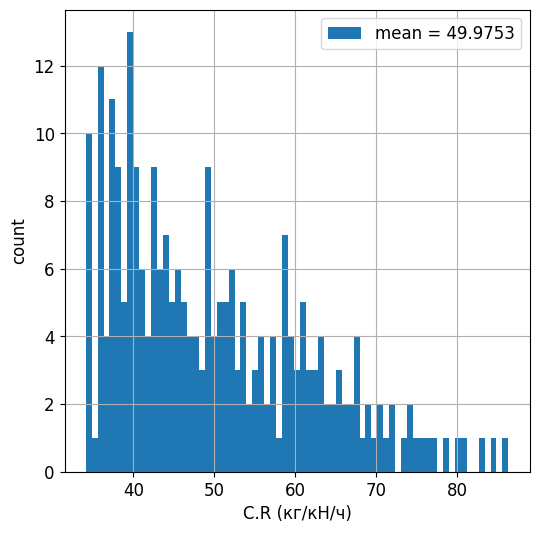

In [42]:
show_analysis(df, ('C.R', ), ('m2', ), figsize=(6, 6), xlabel='C.R (кг/кН/ч)', savefig=True)

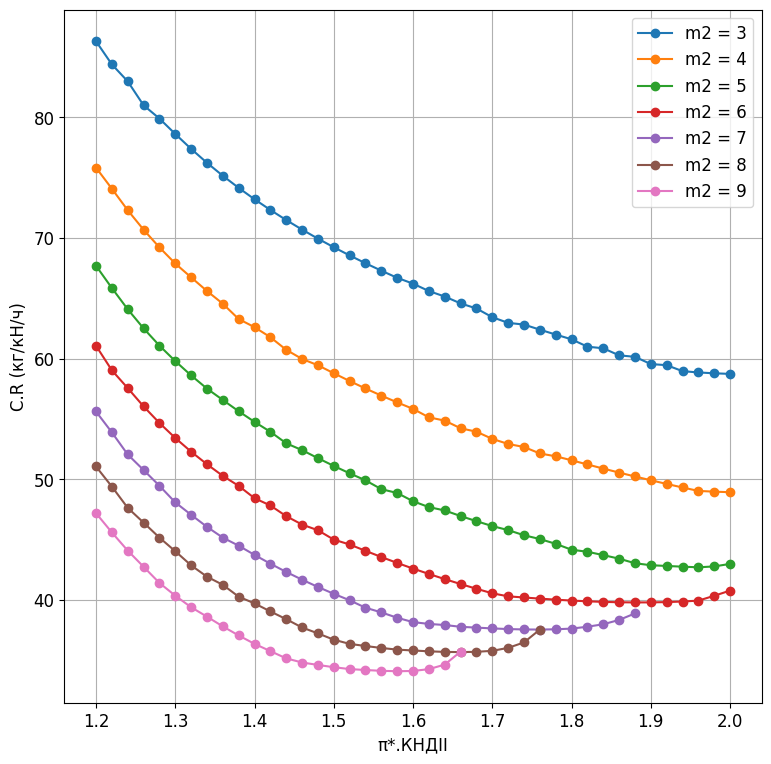

In [43]:
show_analysis(df, ('π*.КНДII', 'C.R'), ('m2', ), ylabel='C.R (кг/кН/ч)', savefig=True)

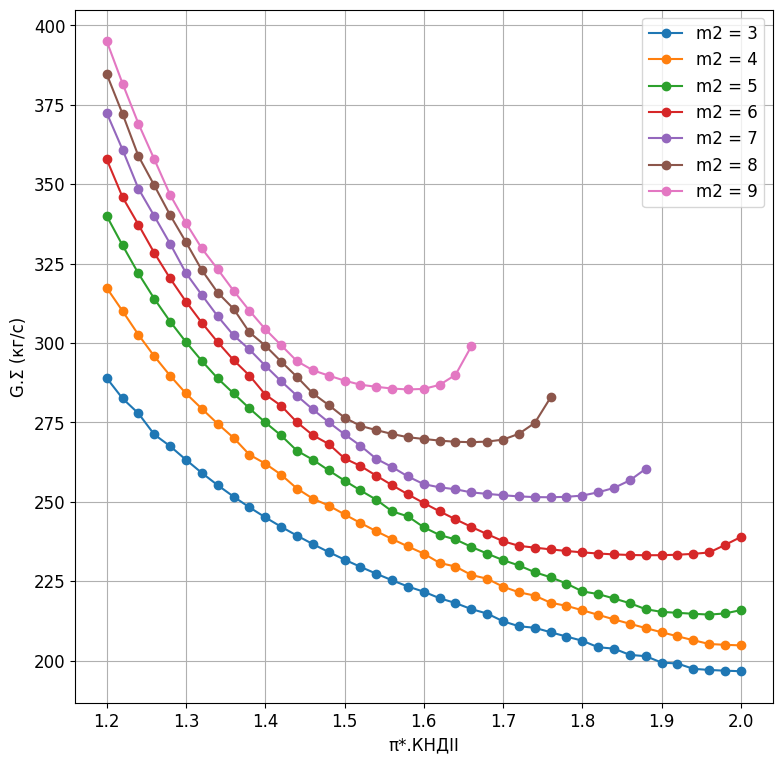

In [44]:
show_analysis(df, ('π*.КНДII', 'G.Σ'), ('m2', ), ylabel='G.Σ (кг/с)', savefig=True)

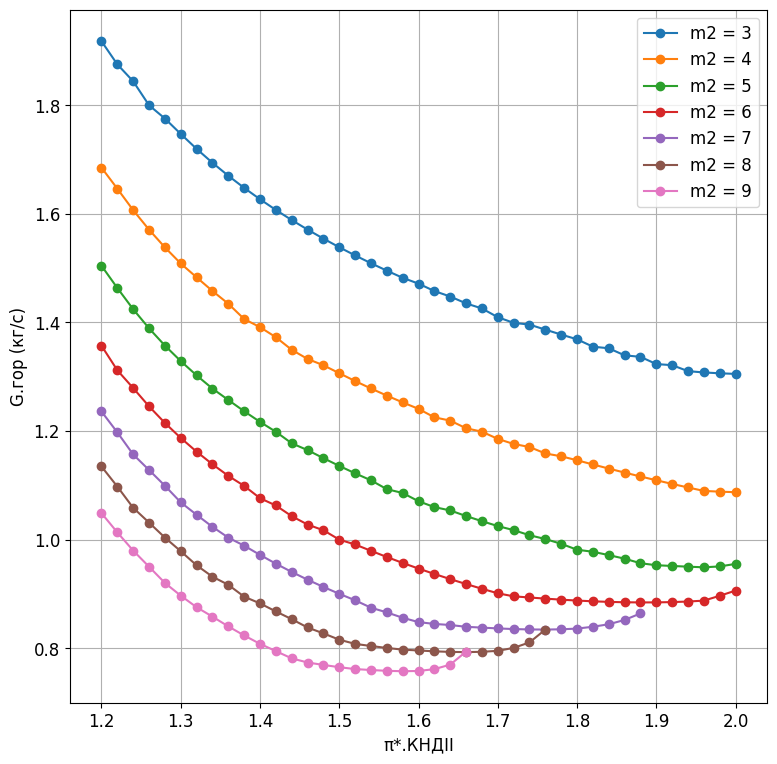

In [45]:
show_analysis(df, ('π*.КНДII', 'G.гор'), ('m2', ), ylabel='G.гор (кг/с)', savefig=True)

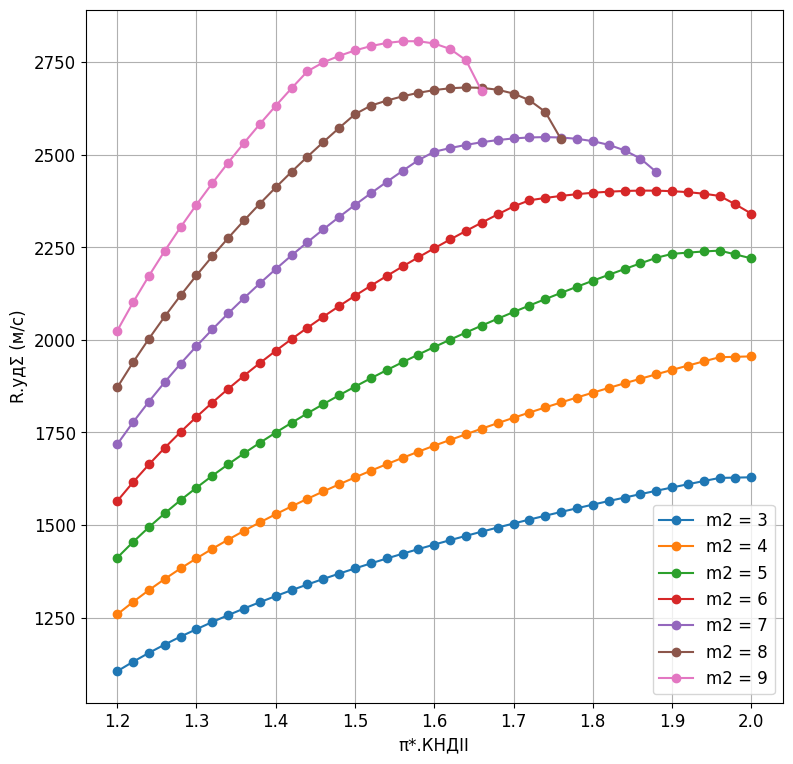

In [46]:
show_analysis(df, ('π*.КНДII', 'R.удΣ'), ('m2', ), ylabel='R.удΣ (м/с)', savefig=True)

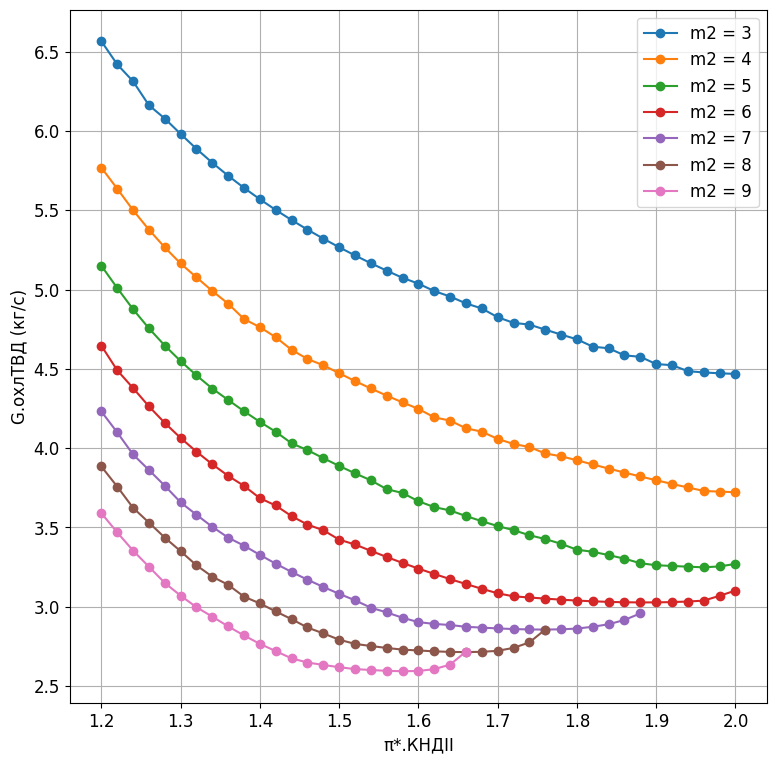

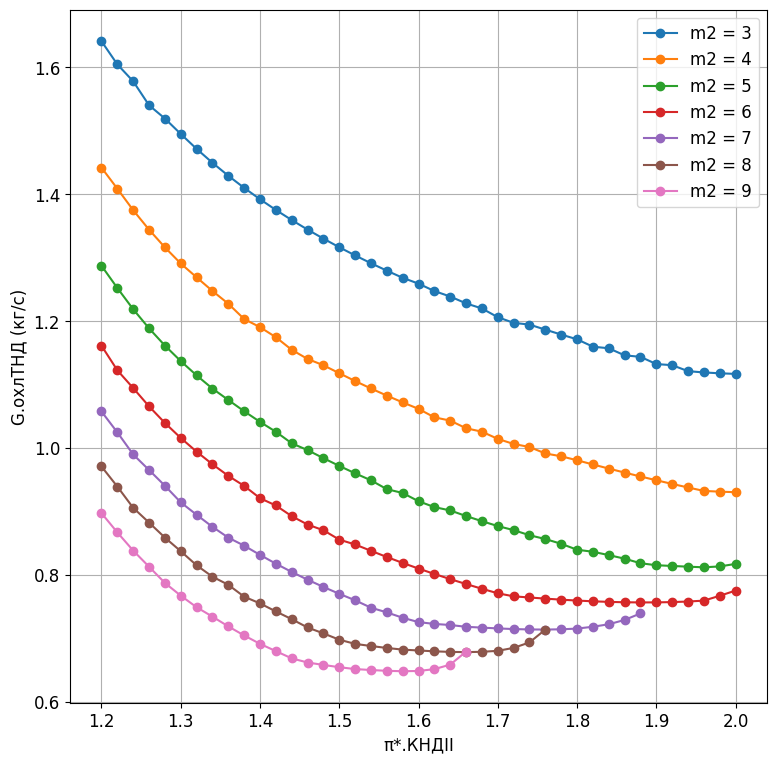

In [50]:
show_analysis(df, ('π*.КНДII', 'G.охлТВД'), ('m2', ), ylabel='G.охлТВД (кг/с)', savefig=True) 
show_analysis(df, ('π*.КНДII', 'G.охлТНД'), ('m2', ), ylabel='G.охлТНД (кг/с)', savefig=True) 

## correlation

Удаление неинформативных колонок

In [51]:
df_unique = df.loc[:, df.nunique() != 1]
df_unique

m2        Cx       R.удII       R.удI        R.удΣ      c.СII3  \
0    5   0.04976   786.650071  624.991207  1411.641278  157.487502   
1    5   0.04976   830.987811  623.204943  1454.192754  166.363926   
2    5   0.04976   872.654023  621.430909  1494.084932   174.70551   
3    5   0.04976   912.024979  619.671133  1531.696112  182.587583   
4    5   0.04976    949.39555  617.925263  1567.320813  190.069179   
..  ..       ...          ...         ...          ...         ...   
282  4  0.050708  1347.034014  583.409243  1930.443256  337.095599   
283  4  0.050708   1359.60138  582.290509  1941.891889  340.240586   
284  4  0.050708  1371.890922  581.177153  1953.068074  343.316046   
285  4  0.050708  1374.118565  580.072806  1954.191371  343.873515   
286  4  0.050708  1376.326059  578.974211   1955.30027  344.425941   

          c.СI3       η*.e π*.КIIΣ      π*.ТΣ  ...       T*.СI1       T*.СI3  \
0     615.41999  22.688815     1.2   6.085802  ...  1174.845901  1174.845901   
1    613.661081  23.232037    1.22   6.260535  ...  1167.981224  1167.981224   
2    611.914215  23.770329    1.24   6.439566  ...  1161.183119  1161.183119   
3    610.181389  24.302936    1.26   6.622737  ...  1154.458941  1154.458941   
4    608.462255  24.829974    1.28   6.810139  ...    1147.8069    1147.8069   
..          ...        ...     ...        ...  ...          ...          ...   
282  574.474819  35.161502    1.92  11.949228  ...  1020.209431  1020.209431   
283  573.373218  35.482366    1.94  12.178448  ...  1016.199183  1016.199183   
284  572.276911  35.798638    1.96  12.411403  ...   1012.21607   1012.21607   
285  571.189477  35.811181    1.98  12.647317  ...   1008.27294   1008.27294   
286  570.107706  35.823361       2  12.886931  ...  1004.358009  1004.358009   

      P*.КНДII3     P*.ТВД3     P*.ТНД1     P*.ТНД3     P*.СII1     P*.СII3  \
0     119.76615  942.316829  932.893661  467.379571  117.370827     101.325   
1    121.762253  942.102441  932.681417  454.409838  119.327007     101.325   
2    123.758355  941.868394   932.44971  441.851871  121.283188     101.325   
3    125.754458  941.645764  932.229306  429.705447  123.239368     101.325   
4     127.75056  941.434944  932.020594  417.953881  125.195549     101.325   
..          ...         ...         ...         ...         ...         ...   
282   191.62584  940.154361  930.752817  239.227439  187.793323     101.325   
283  193.621943  940.086426  930.685562  234.769943  189.749504     101.325   
284  195.618045  940.019886  930.619687  230.408425  191.705684  101.333226   
285  197.614148  939.997796  930.597818  226.154146  193.661865  102.369639   
286   199.61025  939.983433  930.583599  221.992409  195.618045  103.406103   

         P*.СI1      P*.СI3  
0    467.379571   254.40777  
1    454.409838  247.314491  
2    441.851871  240.447158  
3    429.705447  233.805606  
4    417.953881  227.380666  
..          ...         ...  
282  239.227439  129.771804  
283  234.769943   127.34102  
284  230.408425  124.962787  
285  226.154146  122.643237  
286  221.992409  120.374345  

[287 rows x 83 columns]

In [52]:
def corrplot(dataframe, rnd=3, **kwargs):
    """Тепловая карта матрицы корреляции"""
    assert type(rnd) is int and rnd >= 0
    corr = dataframe.corr()
    if kwargs.get('dropna', False): corr = corr.dropna(axis=0, how='all').dropna(axis=1, how='all')
    plt.figure(figsize=kwargs.get('figsize', (12, 12)))
    plt.title(kwargs.get('title', 'corrplot'), fontsize=16, fontweight='bold')
    sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)),
                annot=True, fmt=f'.{rnd}f', annot_kws={'rotation': 45}, cmap='RdYlGn', square=True, vmin=-1, vmax=1)
    if kwargs.get('savefig', False): plt.savefig('corrplot.png')
    plt.tight_layout()
    plt.show()

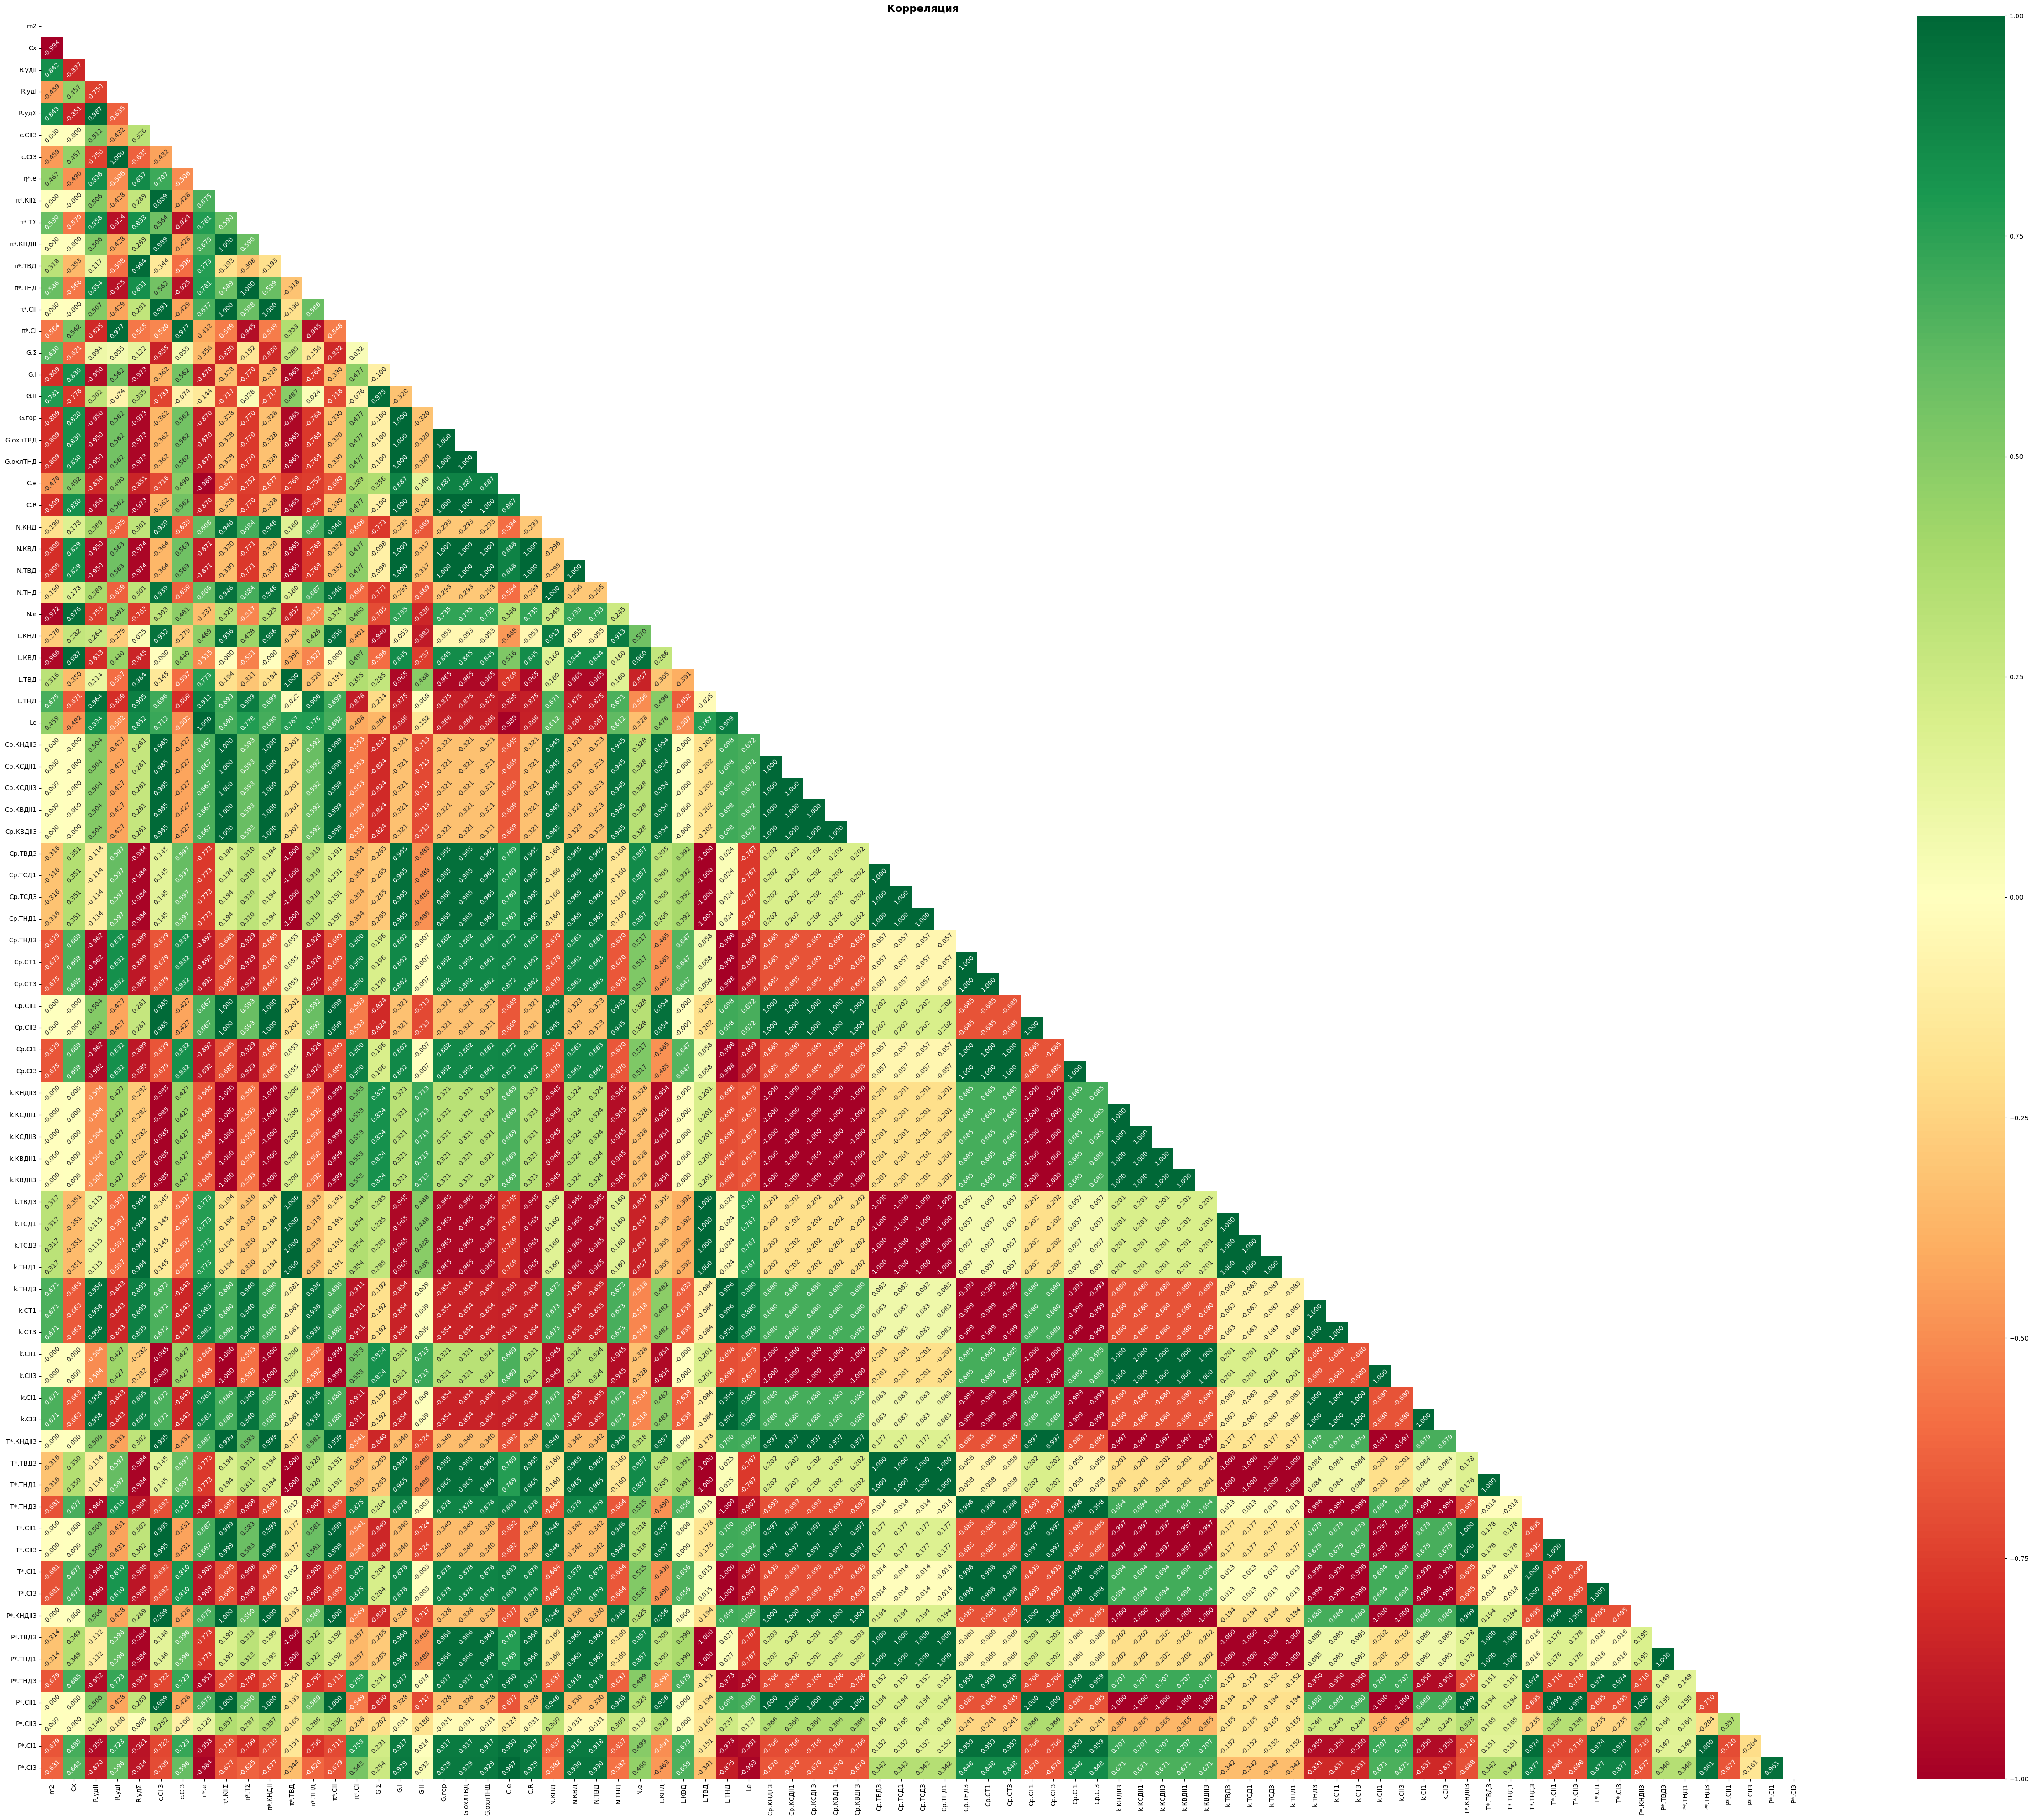

In [53]:
corrplot(df_unique, rnd=3, dropna=True, figsize=(50, 40), title='Корреляция', savefig=True)

## display

In [51]:
list(df_display.columns)

['m2',
 'Cx',
 'R.удII',
 'R.удI',
 'R.удΣ',
 'π*.КIIΣ',
 'π*.ТΣ',
 'π*.КНДII',
 'π*.ТВД',
 'π*.ТНД',
 'π*.СII',
 'π*.СI',
 'G.Σ',
 'G.I',
 'G.II',
 'G.гор',
 'G.охлТВД',
 'G.охлТНД',
 'C.e',
 'C.R',
 'L.КНД',
 'L.КВД',
 'L.ТВД',
 'L.ТНД',
 'Le',
 'k.КНДII3',
 'k.КСДII1',
 'k.КСДII3',
 'k.КВДII1',
 'k.КВДII3',
 'k.ТВД3',
 'k.ТСД1',
 'k.ТСД3',
 'k.ТНД1',
 'k.ТНД3',
 'k.СТ1',
 'k.СТ3',
 'k.СII1',
 'k.СII3',
 'k.СI1',
 'k.СI3',
 'T*.КНДII3',
 'T*.ТВД3',
 'T*.ТНД1',
 'T*.ТНД3',
 'T*.СII1',
 'T*.СII3',
 'T*.СI1',
 'T*.СI3',
 'P*.КНДII3',
 'P*.ТВД3',
 'P*.ТНД1',
 'P*.ТНД3',
 'P*.СII1',
 'P*.СII3',
 'P*.СI1',
 'P*.СI3']

In [ ]:
df_display = df.iloc[::10]  # разреженность
df_display = df_display.drop(columns=df.columns[df.nunique() == 1])  # nunique
df_display = df_display.drop(columns=[c for c in df_display.columns if c.startswith('α') or c.startswith('Cp') or c.startswith('η') or c.startswith('N') or c.startswith('c')])
df_display = df_display.sort_values(['m2', 'π*.КНДII'])
df_display.T

205          215          225          235          245  \
m2                   3            3            3            3            3   
Cx            0.051763     0.051763     0.051763     0.051763     0.051763   
R.удII      471.990043   685.389529   833.753083   950.283514  1032.244544   
R.удI       633.139516   622.693801   613.395125   604.731862     596.5907   
R.удΣ      1105.129559   1308.08333  1447.148208  1555.015377  1628.835245   
π*.КIIΣ            1.2          1.4          1.6          1.8            2   
π*.ТΣ         5.379028     6.309851     7.322143     8.428147     9.637333   
π*.КНДII           1.2          1.4          1.6          1.8            2   
π*.ТВД         3.07382     3.077886     3.080768     3.083051      3.08469   
π*.ТНД        1.749949      2.05006     2.376727     2.733703     3.124247   
π*.СII         1.15836      1.35142      1.54448      1.73754     1.891746   
π*.СI          1.83602     1.837448      1.83878     1.840071     1.841327   
G.Σ         288.925957   245.083197   221.665611   206.225028   196.628124   
G.I          72.231489    61.270799    55.416403    51.556257    49.157031   
G.II        216.694468   183.812398   166.249209   154.668771   147.471093   
G.гор         1.917915     1.626883     1.471435     1.368939     1.305234   
G.охлТВД      6.565376      5.56912     5.036993     4.686131     4.468057   
G.охлТНД      1.641344      1.39228     1.259248     1.171533     1.117014   
C.e           0.403392     0.351258     0.314049     0.286108     0.268083   
C.R          86.306156    73.209721    66.214566    61.602252    58.735525   
L.КНД        46.288963    58.269681    69.082489    78.967275    88.094012   
L.КВД       102.593406   102.593406   102.593406   102.593406   102.593406   
L.ТВД       428.548754   428.991315   429.304554   429.552514   429.730263   
L.ТНД       185.361955   233.338174   276.637551   316.220708   352.768293   
Le          234.529629   269.276276   301.219126    330.70723   353.000819   
k.КНДII3      1.400818      1.40018      1.39949     1.398771     1.398039   
k.КСДII1      1.400818      1.40018      1.39949     1.398771     1.398039   
k.КСДII3      1.400818      1.40018      1.39949     1.398771     1.398039   
k.КВДII1      1.400818      1.40018      1.39949     1.398771     1.398039   
k.КВДII3      1.400818      1.40018      1.39949     1.398771     1.398039   
k.ТВД3        1.297442     1.297457     1.297467     1.297476     1.297481   
k.ТСД1        1.297387     1.297402     1.297412      1.29742     1.297426   
k.ТСД3        1.297387     1.297402     1.297412      1.29742     1.297426   
k.ТНД1        1.297387     1.297402     1.297412      1.29742     1.297426   
k.ТНД3         1.30594     1.308295     1.310492     1.312621     1.314692   
k.СТ1          1.30594     1.308295     1.310492     1.312621     1.314692   
k.СТ3          1.30594     1.308295     1.310492     1.312621     1.314692   
k.СII1        1.400818      1.40018      1.39949     1.398771     1.398039   
k.СII3        1.400818      1.40018      1.39949     1.398771     1.398039   
k.СI1          1.30594     1.308295     1.310492     1.312621     1.314692   
k.СI3          1.30594     1.308295     1.310492     1.312621     1.314692   
T*.КНДII3   306.102713    322.01217   336.353655   349.447715   361.521869   
T*.ТВД3    1371.676108  1371.335231  1371.093954  1370.902956  1370.766037   
T*.ТНД1    1371.676108  1371.335231  1371.093954  1370.902956  1370.766037   
T*.ТНД3    1206.410573  1166.020525  1130.634784  1098.151958  1068.055124   
T*.СII1     306.102713    322.01217   336.353655   349.447715   361.521869   
T*.СII3     306.102713    322.01217   336.353655   349.447715   361.521869   
T*.СI1     1206.410573  1166.020525  1130.634784  1098.151958  1068.055124   
T*.СI3     1206.410573  1166.020525  1130.634784  1098.151958  1068.055124   
P*.КНДII3    119.76615   139.727175     159.6882   179.649225    199.61025   
P*.ТВД3     946.183838   945.044748   944

In [ ]:
def polygon(n:int, R: int | float, O: tuple[int | float]) -> tuple[list[float], list[float]]:
    """Генерация координат точек многоугольника"""
    if type(n) is not int: raise TypeError('type(n) is int!')
    a = 360 / n
    x, y = [O[0]], [O[1]]
    for i in range(n-1):
        x.append(Mx(x[i],y[i],O[0],O[1],a))
        y.append(My(x[i],y[i],O[0],O[1],a))
    return (x, y)

In [ ]:
def node_sketch(type_fig, *args, **kwargs) -> dict[str: list]:
    """Генерация координат схем узлов ГТД"""
    type_fig = type_fig.strip().lower()
    x0 = kwargs.get('x0', 0)
    y0 = kwargs.get('y0', 0)
    x, y = [], []

    if 'inlet' in type_fig:
        x = [[x0 - 0.4, x0 + 0.4, x0 + 0.4, x0 - 0.4]]
        y = [[y0 + 0.4, y0 + 0.4, y0 - 0.4, y0 - 0.4]]
    elif 'compressor' in type_fig:
        x = [[x0 - 0.4, x0 + 0.4, x0 + 0.4, x0 - 0.4, x0 - 0.4]]
        y = [[y0 + 0.4, y0 + 0.2, y0 - 0.2, y0 - 0.4, y0 + 0.4]]
    elif 'combustionchamber' in type_fig:
        x = [[0.4 * cos(alpha) + x0 for alpha in linspace(0, radians(360), 360)]]
        y = [[0.4 * sin(alpha) + y0 for alpha in linspace(0, radians(360), 360)]]
    elif 'turbine' in type_fig:
        x = [[x0 - 0.4, x0 + 0.4, x0 + 0.4, x0 - 0.4, x0 - 0.4]]
        y = [[y0 + 0.2, y0 + 0.4, y0 - 0.4, y0 - 0.2, y0 + 0.2]]
    elif 'nozzle' in type_fig:
        x = [[x0 - 0.4, x0, x0 + 0.4, x0 + 0.4, x0, x0 - 0.4, x0 - 0.4]]
        y = [[y0 + 0.4, y0 + 0.2, y0 + 0.4, y0 - 0.4, y0 - 0.2, y0 - 0.4, y0 + 0.4]]
    elif 'outlet' in type_fig:
        x = [[x0 + 0.4, x0 - 0.4, x0 - 0.4, x0 + 0.4]]
        y = [[y0 + 0.4, y0 + 0.4, y0 - 0.4, y0 - 0.4]]
    elif 'heatexchanger' in type_fig:
        x = [[x0 - 0.4, x0 + 0.4, x0 + 0.4, x0 - 0.4, x0 - 0.4], [x0 - 0.2, x0 - 0.1, x0, x0 + 0.1, x0 + 0.2]]
        y = [[y0 + 0.4, y0 + 0.4, y0 - 0.4, y0 - 0.4, y0 + 0.4], [y0 + 0.1, y0 - 0.1, y0 + 0.1, y0 - 0.1, y0 + 0.1]]
    elif 'load' in type_fig:
        x = [[x0 - 0.4, x0, x0 + 0.4, x0 - 0.4]]
        y = [[y0 - 0.4, y0 + 0.4, y0 - 0.4, y0 - 0.4]]
    return {'x': x, 'y': y}

In [ ]:
def draw_longitudinal_section_parameters(self):
    """График распределения термодинамических параметров по продольному сечению ГТД"""
    fg = plt.figure(figsize=(13, 6))  # размер в дюймах
    fg.suptitle('Thermodynamic parameters | Термодинамические параметры', fontsize=16, fontweight='bold')
    gs = fg.add_gridspec(1, len(self.scheme))  # строки, столбцы

    step_node = 8
    step = 2

    for contour in self.scheme:
        x = [1]
        TT, PP, ρρ, g = [], [], [], []
        for node in self.scheme[contour]:
            x.append(x[-1] + step_node)
            TT.append(node.TT1)
            PP.append(node.PP1)
            ρρ.append(node.ρρ1)
            g.append(node.g1)
            x.append(x[-1] + step)
            TT.append(node.TT3)
            PP.append(node.PP3)
            ρρ.append(node.ρρ3)
            g.append(node.g3)
        x.pop(-1)

        ax = fg.add_subplot(gs[0, contour - 1])  # позиция графика
        plt.title('contour ' + to_roman(contour) + ' | ' + 'контур ' + to_roman(contour), fontsize=14)
        plt.grid(True)
        plt.ylim([-0.1, 1.1])
        ax.set_xticks(range(0, len(x) * 10, 10))
        ax.set_yticks(linspace(-0.1, 1.1, 13))
        plt.xlabel('nodes | узлы', fontsize=14)

        for i, node in enumerate(self.scheme[contour]):
            plt.text(x[2 * i], 0, type(node).__name__ + '1', fontsize=12, rotation=90)
            plt.text((x[2 * i] + x[2 * i + 1]) / 2, 0, type(node).__name__, fontsize=12, rotation=90)
            plt.text(x[2 * i + 1], 0, type(node).__name__ + '3', fontsize=12, rotation=90)

        plt.plot(list(x[i] for i, _ in enumerate(x)), list(TT[i] / max(TT) for i, _ in enumerate(x)),
                 color='red', ls='-', linewidth=2, marker='o', label='T*')
        plt.plot(list(x[i] for i, _ in enumerate(x)), list(PP[i] / max(PP) for i, _ in enumerate(x)),
                 color='blue', ls='-', linewidth=2, marker='o', label='P*')
        plt.plot(list(x[i] for i, _ in enumerate(x)), list(ρρ[i] / max(ρρ) for i, _ in enumerate(x)),
                 color='green', ls='-', linewidth=2, marker='o', label='ρ*')
        plt.plot(list(x[i] for i, _ in enumerate(x)), list(g[i] / max(g) for i, _ in enumerate(x)),
                 color='brown', ls='-', linewidth=2, marker='o', label='G')
    fg.legend(loc='outside left center', fontsize=12)
    export2file(plt, file_name='GTE_longitudinal_section_parameters', file_type='png', show_time=True)
    plt.show()

In [ ]:
def delta_entrophy(Cp2=nan, T1=nan, T3=nan, R2=nan, P1=nan, P3=nan,
                   a_ox1=nan, a_ox2=nan, a_ox3=nan, substance='', fuel='') -> float:
    """Изменение энтропии [Дж/кг]"""
    if Cp2 is nan: Cp2 = Cp(substance, T=0.5 * (T1 + T3))  # TODO среднее значение через интеграл
    if R2 is nan:
        if a_ox2 is nan:
            R2 = R_gas(substance, a_ox=0.5 * (a_ox1 + a_ox3), fuel=fuel)  # TODO среднее значение через интеграл
        else:
            R2 = R_gas(substance, a_ox=a_ox2, fuel=fuel)
    return Cp2 * log(T3 / T1) - R2 * log(P3 / P1)

In [ ]:
def draw_cycle(scheme: dict, type_cycle: str) -> None:
    """График цикла ГТД"""
    fg = plt.figure(figsize=(13, 6))  # размер в дюймах
    fg.suptitle('CYCLE GTE | ЦИКЛ ГТД', fontsize=14, fontweight='bold')
    gs = fg.add_gridspec(1, len(scheme))  # строки, столбцы
    if type_cycle.upper() in ('TS', 'T(S)', 'T_S', 'ST', 'S(T)', 'S_T'):
        for contour in scheme:
            # начало отсчета
            S = [0]  # [Дж/кг]
            T = [288.15]  # [К] МСА
            P = [101325]  # [Па] МСА
            for node in scheme[contour]:
                # перед
                S.append(S[len(S) - 1] + delta_entrophy(Cp2=node.Cp1, T1=T[len(T) - 1], T3=node.TT1,
                                                        R2=node.R_gas1, P1=P[len(P) - 1], P3=node.PP1))
                T.append(node.TT1)
                P.append(node.PP1)
                # после
                S.append(S[len(S) - 1] + delta_entrophy(Cp2=node.Cp3, T1=T[len(T) - 1], T3=node.TT3,
                                                        R2=node.R_gas3, P1=P[len(P) - 1], P3=node.PP3))
                T.append(node.TT3)
                P.append(node.PP3)

            del S[0], T[0], P[0]  # удаление начала отсчета

            if len(S) >= 3:  # замкнутость цикла
                S.append(S[0])
                T.append(T[0])
                P.append(P[0])

            # TODO сделать тут промежуточные значения между характерными точками в количестве dis штук

            print(Fore.MAGENTA + 'contour ', to_roman(contour), '|', Fore.MAGENTA + 'контур ', to_roman(contour))
            for i in range(len(S)): print('T =', round(T[i], 3), '[К]', ';', 'S =', round(S[i], 3), '[Дж/К]')

            fg.add_subplot(gs[0, contour - 1])  # позиция графика
            plt.grid(True)
            plt.xlabel('S [Дж/кг]', fontsize=12)
            plt.ylabel('T [К]', fontsize=12)
            plt.title('contour ' + to_roman(contour) + ' | ' + 'контур ' + to_roman(contour), fontsize=12)
            plt.plot(S, T, color=(0, 0, 0), ls='-', linewidth=2, marker='o')
            i = 0
            for node in scheme[contour]:
                plt.text(S[i], T[i], type(node).__name__ + '1', color=(0, 1, 1), fontsize=12)
                i += 1
                plt.text(S[i], T[i], type(node).__name__ + '3', color=(0, 1, 1), fontsize=12)
                i += 1

        export2file(plt, file_name='GTE_cycle_T(S)', file_type='png', show_time=True)
        plt.show()
    else:
        print(Fore.RED + 'No find such typy of cycle!')

scheme 2023-10-07 13-47-13.png file has created!
Elapsed time: 0.3114 seconds


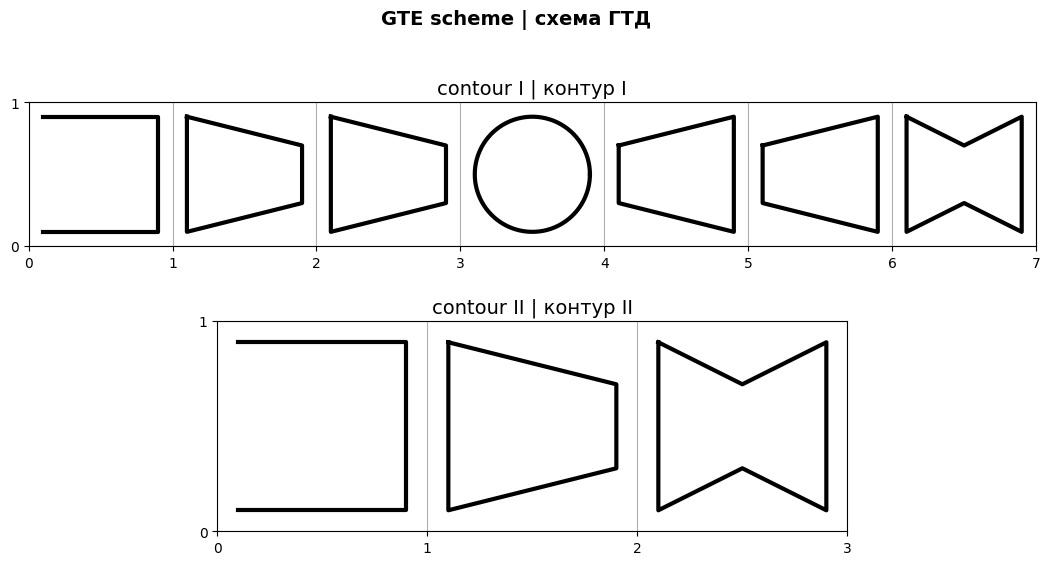

In [ ]:
scheme = dict()
c = 0
for key in input_dct:
    if 'contour' in key: 
        c+=1
        scheme[c] = input_dct[key][0].split('+') 
del c

fg = plt.figure(figsize=(13, 6))  # размер в дюймах
fg.suptitle('GTE scheme | схема ГТД', fontsize=14, fontweight='bold')
gs = fg.add_gridspec(len(scheme), 1)  # строки, столбцы

for contour in scheme:
    fg.add_subplot(gs[contour - 1, 0])
    plt.grid(True)
    plt.axis('square')
    plt.title('contour ' + to_roman(contour) + ' | ' + 'контур ' + to_roman(contour), fontsize=14)
    plt.xlim(0, len(scheme[contour]))
    plt.ylim(0, 1)
    plt.xticks(linspace(0, len(scheme[contour]), len(scheme[contour]) + 1))
    plt.yticks(linspace(0, 1, 1 + 1))

    x0, y0 = 0.5, 0.5

    for node in scheme[contour]:
        xy = node_sketch(node, x0=x0, y0=y0)
        for i in range(len(xy['x'])): plt.plot(xy['x'][i],xy['y'][i], color='black', linewidth=3)
        x0 += 1
export2file(plt, file_place='exports/analysis', file_name='scheme', show_time=True, file_type='png')
plt.show()